# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 1. Intro Machine Learning**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.  

>Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.  

**Objetivos**  

Los objetivos de hoy son:  

1. Buscar un conjunto de datos a analizar:  

    - Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [2]:
df = pd.read_csv("datos/soci_econ_country_profiles.csv", index_col = 0)
df.head(2)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,909

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:  
    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.   
    - Realizar un EDA sencillo para la variable dependiente y las variables independientes.  


!!!!!!!!!!!!!!!!!!!!           EXPLICACIÓN DATOS

- Seleccionamos nuestra variable respuesta: Restaurant Price Index.

In [3]:
# seleccionamos las columnas que consideramos que  nos pueden resultar útiles ya que el dataset es demasiado extenso para ser manejable completo.
# En un primer momento nos quedamos tan solo con las columnas que por "sentido común" podrían estar relacionadas con nuestra variable respuesta. 
df_country = df.filter(spv.lista_columnas, axis=1)

In [4]:
nuevas_columnas = {col: col.replace(" ", "_").lower() for col in df_country.columns}
df_country.rename(columns = nuevas_columnas, inplace = True)
df_country.sample()

,country,region,population_in_thousands_(2017),gdp_per_capita_(current_us$),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),"population_age_distribution_(0-14_/_60+_years,_%)",international_migrant_stock_(000/%_of_total_pop.),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_(constant_2010_us$),consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y
48,Serbia,SouthernEurope,8791,5238.6,19.4,24.5,56.1,16.5/24.5,807.4/9.1,4.2,133.43,40.8,61.38,33.79,7.25,24.96,27.2,5116.376951,138.665453,0.755,3.131062,55.942


In [5]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 22 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   country                                                      66 non-null     object 
 1   region                                                       66 non-null     object 
 2   population_in_thousands_(2017)                               66 non-null     int64  
 3   gdp_per_capita_(current_us$)                                 66 non-null     float64
 4   employment:_agriculture_(%_of_employed)                      66 non-null     float64
 5   employment:_industry_(%_of_employed)                         66 non-null     float64
 6   employment:_services_(%_of_employed)                         66 non-null     float64
 7   population_age_distribution_(0-14_/_60+_years,_%)            66 non-null     objec

In [6]:
# vemos que la columna 'education:_government_expenditure_(%_of_gdp)' debería ser numérica y es tipo object.
df_country['education:_government_expenditure_(%_of_gdp)'].unique()

array(['5.3', '5.2', '5.5', '4.9', '6.6', '-99', '6.0', '4.1', '3.3',
       '4.5', '4.6', '6.1', '8.6', '...', '7.2', '5.0', '4.7', '3.8',
       '3.6', '2.9', '5.8', '2.6', '6.4', '7.4', '5.1', '3.1', '3.9',
       '4.2', '4.3', '2.2', '7.7', '4.8', '5.9', '5.7', '5.4'],
      dtype=object)

In [7]:
# reemplazamos por np.nan el valor que no nos permitiría pasar la columna a tipo numérico y lo pasamos a tipo float
df_country['education:_government_expenditure_(%_of_gdp)'] = df_country['education:_government_expenditure_(%_of_gdp)'].apply(lambda dato: float(dato) if '...' not in dato else np.nan)
df_country['education:_government_expenditure_(%_of_gdp)'].unique()

array([  5.3,   5.2,   5.5,   4.9,   6.6, -99. ,   6. ,   4.1,   3.3,
         4.5,   4.6,   6.1,   8.6,   nan,   7.2,   5. ,   4.7,   3.8,
         3.6,   2.9,   5.8,   2.6,   6.4,   7.4,   5.1,   3.1,   3.9,
         4.2,   4.3,   2.2,   7.7,   4.8,   5.9,   5.7,   5.4])

In [8]:
# vemos que las columnas 'population_age_distribution_(0-14_/_60+_years,_%)' y 'international_migrant_stock_(000/%_of_total_pop.)' tienen un doble dato y debemos dividirlas para poder utilizar los datos como numéricos
df_country[['population_age_distribution_(0-14_years,_%)','population_age_distribution_(60+_years,_%)']] = df_country['population_age_distribution_(0-14_/_60+_years,_%)'].str.split('/', expand=True)
df_country[['international_migrant_stock_(000)','international_migrant_stock_(%_of_total_pop.)']] = df_country['international_migrant_stock_(000/%_of_total_pop.)'].str.split('/', expand=True)
# una vez desdobladas eliminamos las columnas originales
df_country.drop(columns=['population_age_distribution_(0-14_/_60+_years,_%)', 'international_migrant_stock_(000/%_of_total_pop.)'], inplace=True)
df_country.head()

,country,region,population_in_thousands_(2017),gdp_per_capita_(current_us$),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_(constant_2010_us$),consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(000),international_migrant_stock_(%_of_total_pop.)
0,Argentina,SouthAmerica,44271,14564.5,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,13.92,44.06,50.37,9094.367252,112.887108,0.611,NaN,91.749,24.9,15.4,2086.3,4.8
1,Australia,Oceania,24451,51352.2,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,42.54,76.87,77.12,43073.967170,115.686785,0.803,1.948647,85.904,19.0,21.0,6763.7,28.2
2,Austria,WesternEurope,8736,44117.7,4.7,25.6,69.7,5.5,190.37,95.66,80.75,71.52,25.86,65.86,66.94,39557.667995,113.999737,0.793,2.081269,58.094,14.1,25.1,1492.4,17.5
3,Belarus,EasternEurope,9468,5750.8,9.6,32.0,58.4,4.9,119.23,36.43,77.74,33.84,12.21,27.19,37.60,5923.223118,NaN,NaN,6.031837,78.134,16.7,21.3,1082.9,11.4
4,Belgium,WesternEurope,11429,40277.8,1.2,21.2,77.6,6.6,160.52,91.02,55.49,75.36,29.64,65.77,82.34,38493.272444,113.128903,0.757,2.125971,97.961,17.1,24.6,1387.9,12.3


In [9]:
# las convertimos a tipo float
for columna in df_country.columns[-4:]:
    df_country[columna] = df_country[columna].apply(lambda dato: float(dato) if type(dato) == str else dato)

In [10]:
# comprobamos que los tipos de datos son correctos
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 24 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   country                                                      66 non-null     object 
 1   region                                                       66 non-null     object 
 2   population_in_thousands_(2017)                               66 non-null     int64  
 3   gdp_per_capita_(current_us$)                                 66 non-null     float64
 4   employment:_agriculture_(%_of_employed)                      66 non-null     float64
 5   employment:_industry_(%_of_employed)                         66 non-null     float64
 6   employment:_services_(%_of_employed)                         66 non-null     float64
 7   education:_government_expenditure_(%_of_gdp)                 60 non-null     float

In [11]:
df_country_num = df_country.select_dtypes(include=np.number)
df_country_num.sample()

,population_in_thousands_(2017),gdp_per_capita_(current_us$),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_(constant_2010_us$),consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(000),international_migrant_stock_(%_of_total_pop.)
55,9911,50687.5,1.8,18.2,79.9,7.7,172.74,107.23,53.35,75.88,26.86,67.94,78.27,48316.276758,106.491775,0.8,1.794499,87.146,17.5,25.5,1639.8,16.8


In [12]:
correl = df_country_num.corr(method='spearman')
correl

,population_in_thousands_(2017),gdp_per_capita_(current_us$),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,rent_index,grocery_index,restaurant_price_index,adjusted_net_national_income_per_capita_(constant_2010_us$),consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(000),international_migrant_stock_(%_of_total_pop.)
population_in_thousands_(2017),1.000000,-0.356936,0.343351,-0.058540,-0.279261,-0.143205,-0.359775,-0.207390,-0.501957,-0.281161,-0.176142,-0.148191,-0.358463,-0.343590,0.487912,-0.307680,0.416392,-0.137377,0.389022,-0.301389,0.421021,-0.507871
gdp_per_capita_(current_us$),-0.356936,1.000000,-0.825057,-0.337839,0.765550,0.419324,0.713182,0.840518,0.466031,0.879971,0.836059,0.805916,0.882318,0.986538,-0.543819,0.794212,-0.589194,0.588838,-0.429630,0.410029,0.302077,0.679632
employment:_agriculture_(%_of_employed),0.343351,-0.825057,1.000000,0.275443,-0.828677,-0.298196,-0.579413,-0.714177,-0.384672,-0.783302,-0.743852,-0.693129,-0.814898,-0.805454,0.435156,-0.649493,0.436576,-0.708130,0.339598,-0.340140,-0.365523,-0.715910
employment:_industry_(%_of_employed),-0.058540,-0.337839,0.275443,1.000000,-0.644879,-0.274409,-0.138167,-0.249611,0.069794,-0.457133,-0.373398,-0.476492,-0.428786,-0.306384,0.103631,-0.217952,0.193708,-0.360683,-0.215993,0.107590,-0.244162,-0.341814
employment:_services_(%_of_employed),-0.279261,0.765550,-0.828677,-0.644879,1.000000,0.419395,0.585389,0.649374,0.237636,0.796342,0.675706,0.705539,0.823010,0.754379,-0.451038,0.639271,-0.393846,0.692741,-0.182060,0.307278,0.350093,0.681874
education:_government_expenditure_(%_of_gdp),-0.143205,0.419324,-0.298196,-0.274409,0.419395,1.000000,0.542838,0.385616,-0.113586,0.361669,0.252090,0.275887,0.468336,0.470404,-0.230117,0.384330,-0.095763,0.219872,0.124581,0.259620,-0.046530,0.205207
quality_of_life_index,-0.359775,0.713182,-0.579413,-0.138167,0.585389,0.542838,1.000000,0.715771,0.444342,0.600250,0.483337,0.474277,0.685322,0.775321,-0.653846,0.653022,-0.455540,0.217662,-0.413533,0.611025,0.093372,0.463088
purchasing_power_index,-0.207390,0.840518,-0.714177,-0.249611,0.649374,0.385616,0.715771,1.000000,0.446618,0.741572,0.731789,0.686011,0.722563,0.843452,-0.454716,0.630676,-0.548031,0.459644,-0.316930,0.248698,0.404154,0.596309
safety_index,-0.501957,0.466031,-0.384672,0.069794,0.237636,-0.113586,0.444342,0.446618,1.000000,0.358317,0.346840,0.289329,0.311216,0.473861,-0.449730,0.504510,-0.551700,0.136335,-0.637646,0.397904,-0.090200,0.388820
cost_of_living,-0.281161,0.879971,-0.783302,-0.457133,0.796342,0.361669,0.600250,0.741572,0.358317,1.000000,0.876369,0.950099,0.911919,0.868956,-0.524130,0.733198,-0.586172,0.632049,-0.338184,0.356043,0.330801,0.655455


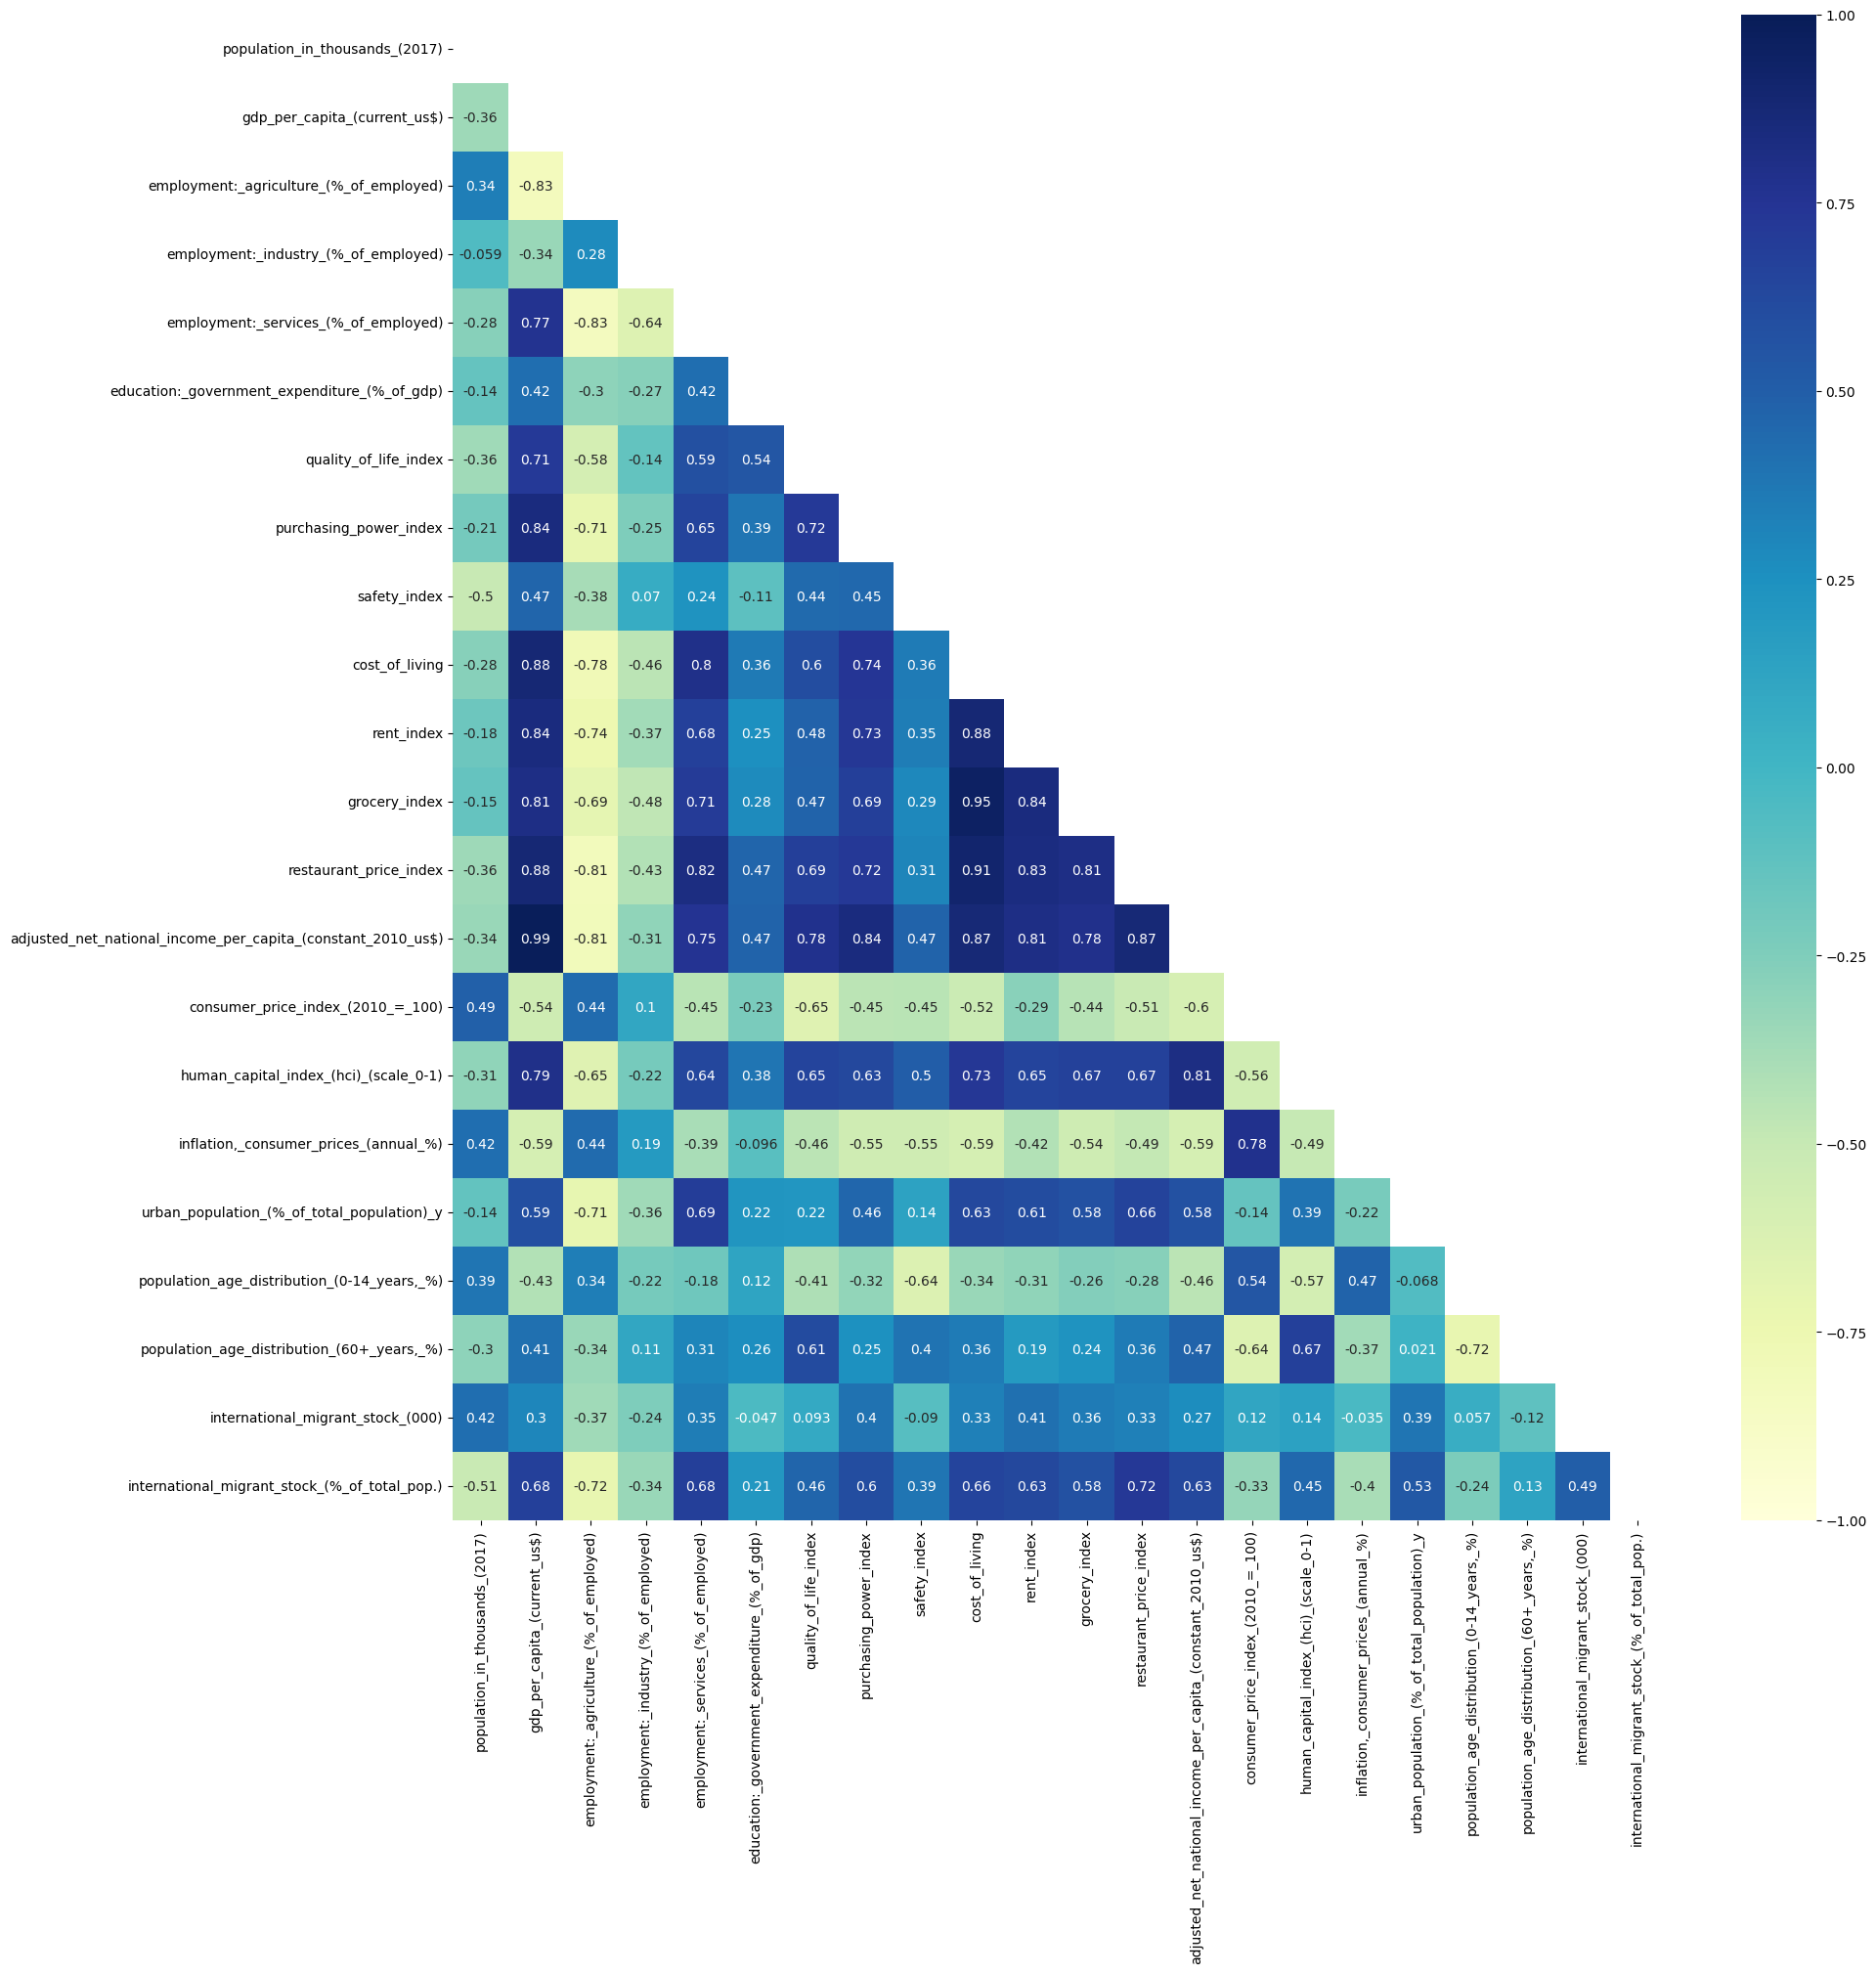

In [13]:
# sacamos el heatmap
mask = np.triu(np.ones_like(correl, dtype = np.bool_))

sns.heatmap(correl, 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1);

In [14]:
# en vista de que algunas de las variables tienen una correlación muy alta y para no complicar en exceso el tratamiento y análisis de los datos con variables redundantes (correlación superior a 0,88) procedemos a eliminar algunas columnas 
# De entre las columnas redundantes eliminamos aquellas que tienen menor correlación con nuestra variable respuesta 
# eliminamos también la columna 'international_migrant_stock_(000)' porque da la  misma información que la de 'international_migrant_stock_(%_of_total_pop.) y tiene menos correlación con la variable respuesta'
df_country.drop(columns=['adjusted_net_national_income_per_capita_(constant_2010_us$)', 'grocery_index', 'gdp_per_capita_(current_us$)', 'rent_index', 'international_migrant_stock_(000)'], inplace=True)

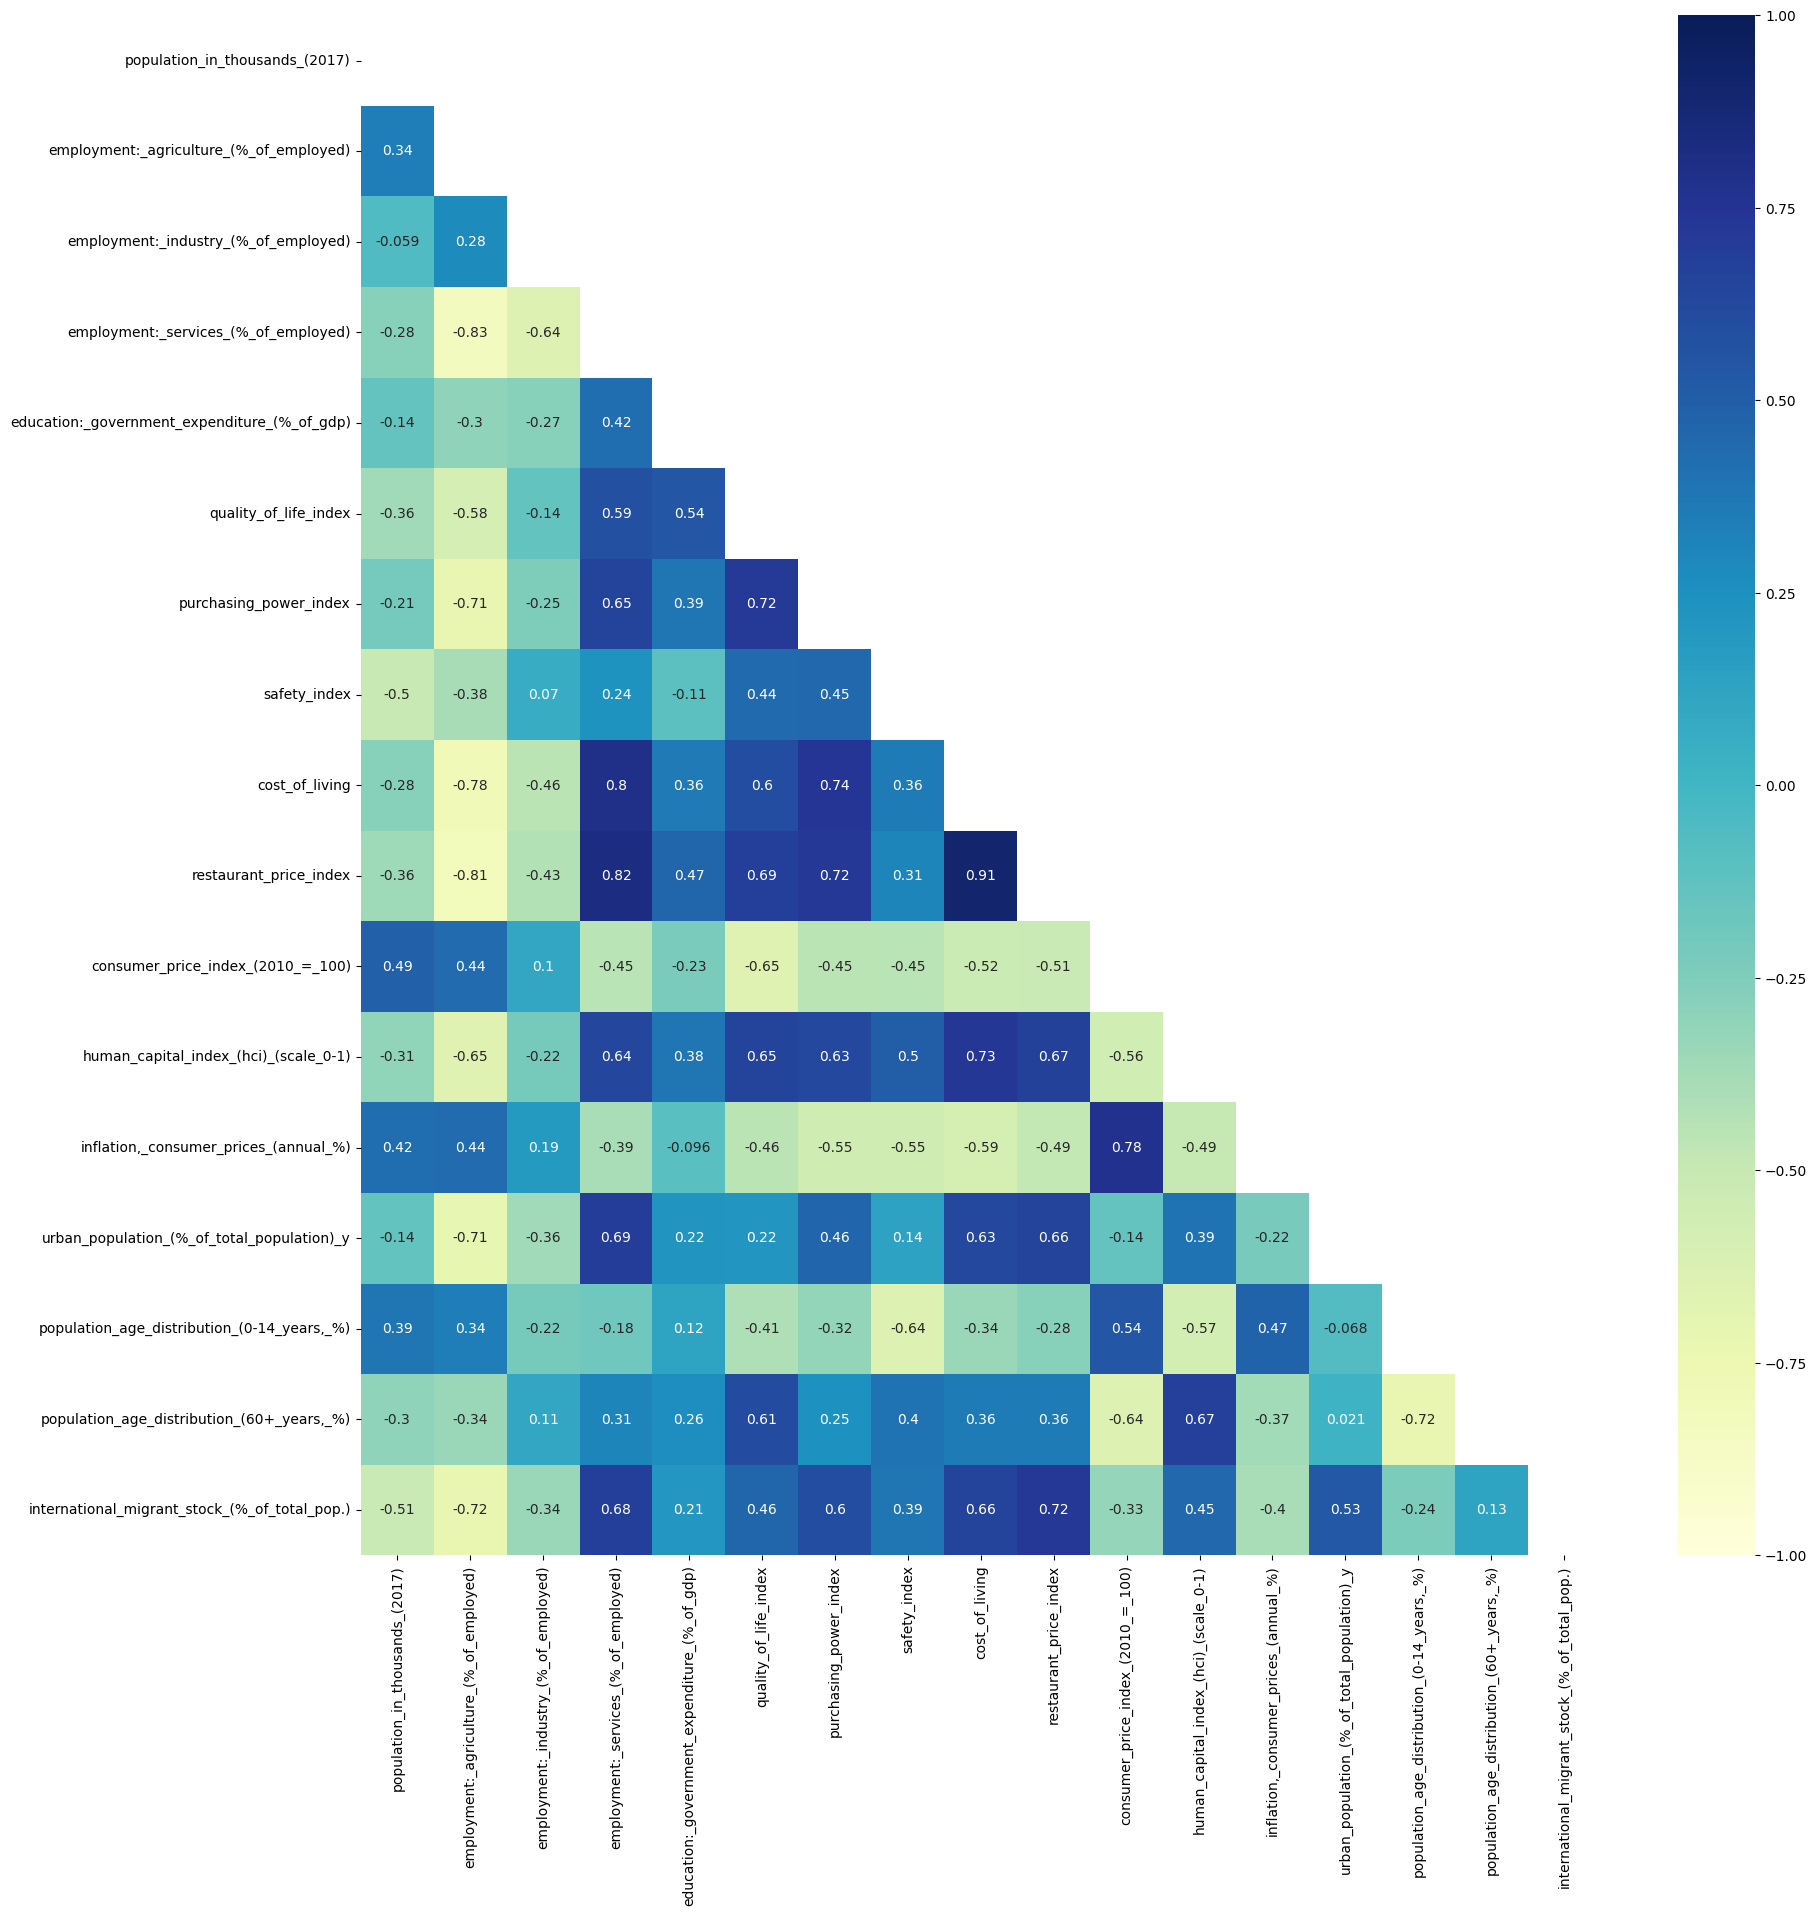

In [15]:
#volvemos a sacar la correlación y el heatmap
df_country_num = df_country.select_dtypes(include=np.number)
correl2 = df_country_num.corr(method='spearman')
# sacamos el heatmap
mask = np.triu(np.ones_like(correl2, dtype = np.bool_))
sns.heatmap(correl2, 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1);

In [16]:
spf.explorar_df(df_country, 'Socio-Economic Country Profile')

EXPLORACIÓN DEL DATAFRAME SOCIO-ECONOMIC COUNTRY PROFILE
---------------------------------------------------------------------------
Las primeras 5 filas del dataframe Socio-Economic Country Profile son:


,country,region,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(%_of_total_pop.)
0,Argentina,SouthAmerica,44271,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,50.37,112.887108,0.611,NaN,91.749,24.9,15.4,4.8
1,Australia,Oceania,24451,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,77.12,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2
2,Austria,WesternEurope,8736,4.7,25.6,69.7,5.5,190.37,95.66,80.75,71.52,66.94,113.999737,0.793,2.081269,58.094,14.1,25.1,17.5
3,Belarus,EasternEurope,9468,9.6,32.0,58.4,4.9,119.23,36.43,77.74,33.84,37.60,NaN,NaN,6.031837,78.134,16.7,21.3,11.4
4,Belgium,WesternEurope,11429,1.2,21.2,77.6,6.6,160.52,91.02,55.49,75.36,82.34,113.128903,0.757,2.125971,97.961,17.1,24.6,12.3


---------------------------------------------------------------------------
Las últimas 5 filas del dataframe Socio-Economic Country Profile son:


,country,region,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(%_of_total_pop.)
61,United Arab Emirates,WesternAsia,9400,3.5,21.1,75.4,-99.0,139.27,116.77,79.34,67.98,63.92,113.302921,0.659,1.966826,86.248,13.9,2.4,88.4
62,United Kingdom,NorthernEurope,66182,1.2,18.4,80.4,5.7,172.87,96.85,58.81,69.49,76.84,114.943592,0.781,2.557756,83.143,17.7,23.9,13.2
63,United States of America,NorthernAmerica,324460,1.5,17.2,81.3,5.4,179.73,123.17,51.24,75.42,70.02,112.411557,0.762,2.130110,82.058,18.9,21.5,14.5
64,Venezuela (Bolivarian Republic of),SouthAmerica,31977,11.9,26.8,61.3,NaN,0.00,3.35,14.72,38.30,37.34,NaN,NaN,NaN,88.183,27.6,9.9,4.5
65,Vietnam,South-easternAsia,95541,41.8,22.9,35.2,5.7,36.12,24.77,47.04,40.11,20.46,153.631652,0.666,3.520257,35.213,23.1,11.1,0.1


---------------------------------------------------------------------------
A comntinuación se muestran 10 filas aleatorias del dataframe Socio-Economic Country Profile:


,country,region,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(%_of_total_pop.)
38,Norway,NorthernEurope,5305,2.2,20.2,77.6,7.4,165.93,105.58,54.31,106.31,117.13,114.550719,0.771,1.875101,81.871,17.8,22.3,14.2
55,Sweden,NorthernEurope,9911,1.8,18.2,79.9,7.7,172.74,107.23,53.35,75.88,78.27,106.491775,0.800,1.794499,87.146,17.5,25.5,16.8
4,Belgium,WesternEurope,11429,1.2,21.2,77.6,6.6,160.52,91.02,55.49,75.36,82.34,113.128903,0.757,2.125971,97.961,17.1,24.6,12.3
20,France,WesternEurope,64980,2.7,20.5,76.8,5.5,160.25,87.29,56.34,74.89,72.89,106.864453,0.765,1.032283,80.180,18.1,25.7,12.1
30,Japan,EasternAsia,127484,3.7,26.5,69.8,3.6,147.49,102.52,79.11,85.28,47.83,103.962704,0.844,0.467212,91.535,12.9,33.4,1.6
64,Venezuela (Bolivarian Republic of),SouthAmerica,31977,11.9,26.8,61.3,NaN,0.00,3.35,14.72,38.30,37.34,NaN,NaN,NaN,88.183,27.6,9.9,4.5
49,Singapore,South-easternAsia,5709,0.3,17.0,82.6,2.9,86.50,92.70,83.42,82.41,58.33,113.265923,0.884,0.576260,100.000,15.0,19.5,45.4
31,Jordan,WesternAsia,9702,2.0,17.8,80.2,-99.0,117.47,42.27,56.86,59.22,56.19,119.329869,0.562,3.323894,90.747,35.5,5.7,41.0
3,Belarus,EasternEurope,9468,9.6,32.0,58.4,4.9,119.23,36.43,77.74,33.84,37.60,NaN,NaN,6.031837,78.134,16.7,21.3,11.4
5,Bosnia and Herzegovina,SouthernEurope,3507,18.0,30.4,51.7,-99.0,139.14,51.29,59.03,35.05,24.22,102.851586,0.618,0.810133,47.876,14.1,23.4,0.9


---------------------------------------------------------------------------
El dataframe Socio-Economic Country Profile tiene 66 filas y 19 columnas
---------------------------------------------------------------------------
A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   country                                        66 non-null     object 
 1   region                                         66 non-null     object 
 2   population_in_thousands_(2017)                 66 non-null     int64  
 3   employment:_agriculture_(%_of_employed)        66 non-null     float64
 4   employment:_industry_(%_of_employed)           66 non-null     float64
 5   employment:_services_(%_of_employed)      

,count,mean,std,min,25%,50%,75%,max
population_in_thousands_(2017),66.0,86551.363636,238173.608572,1180.000000,7155.000000,18867.000000,65881.500000,1.409517e+06
employment:_agriculture_(%_of_employed),66.0,10.575758,10.981566,0.200000,2.700000,6.000000,14.775000,4.430000e+01
employment:_industry_(%_of_employed),66.0,24.056061,6.194865,14.900000,19.900000,23.850000,27.100000,5.410000e+01
employment:_services_(%_of_employed),66.0,65.356061,12.711462,31.200000,58.675000,67.600000,76.100000,8.490000e+01
education:_government_expenditure_(%_of_gdp),60.0,-2.020000,26.167316,-99.000000,3.875000,4.900000,5.500000,8.600000e+00
quality_of_life_index,66.0,134.090455,42.106991,0.000000,102.685000,141.055000,167.110000,1.903700e+02
purchasing_power_index,66.0,71.386818,29.967676,3.350000,47.707500,70.115000,95.855000,1.380500e+02
safety_index,66.0,60.630455,14.160485,14.720000,52.712500,60.100000,70.770000,8.430000e+01
cost_of_living,66.0,55.273485,20.900261,22.360000,38.375000,49.795000,72.912500,1.220600e+02
restaurant_price_index,66.0,48.807879,24.874263,16.380000,28.382500,43.490000,66.617500,1.198500e+02


---------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas son:


,count,unique,top,freq
country,66,66,Argentina,1
region,66,14,EasternEurope,9


---------------------------------------------------------------------------
El dataframe Socio-Economic Country Profile tiene las siguientes columnas: 
Index(['country', 'region', 'population_in_thousands_(2017)',
       'employment:_agriculture_(%_of_employed)',
       'employment:_industry_(%_of_employed)',
       'employment:_services_(%_of_employed)',
       'education:_government_expenditure_(%_of_gdp)', 'quality_of_life_index',
       'purchasing_power_index', 'safety_index', 'cost_of_living',
       'restaurant_price_index', 'consumer_price_index_(2010_=_100)',
       'human_capital_index_(hci)_(scale_0-1)',
       'inflation,_consumer_prices_(annual_%)',
       'urban_population_(%_of_total_population)_y',
       'population_age_distribution_(0-14_years,_%)',
       'population_age_distribution_(60+_years,_%)',
       'international_migrant_stock_(%_of_total_pop.)'],
      dtype='object')
---------------------------------------------------------------------------
El numero de v

In [17]:
# quitamos la variable respuesta de las numéricas para sacar los regplots
df_country_num = df_country_num.drop(columns="restaurant_price_index")

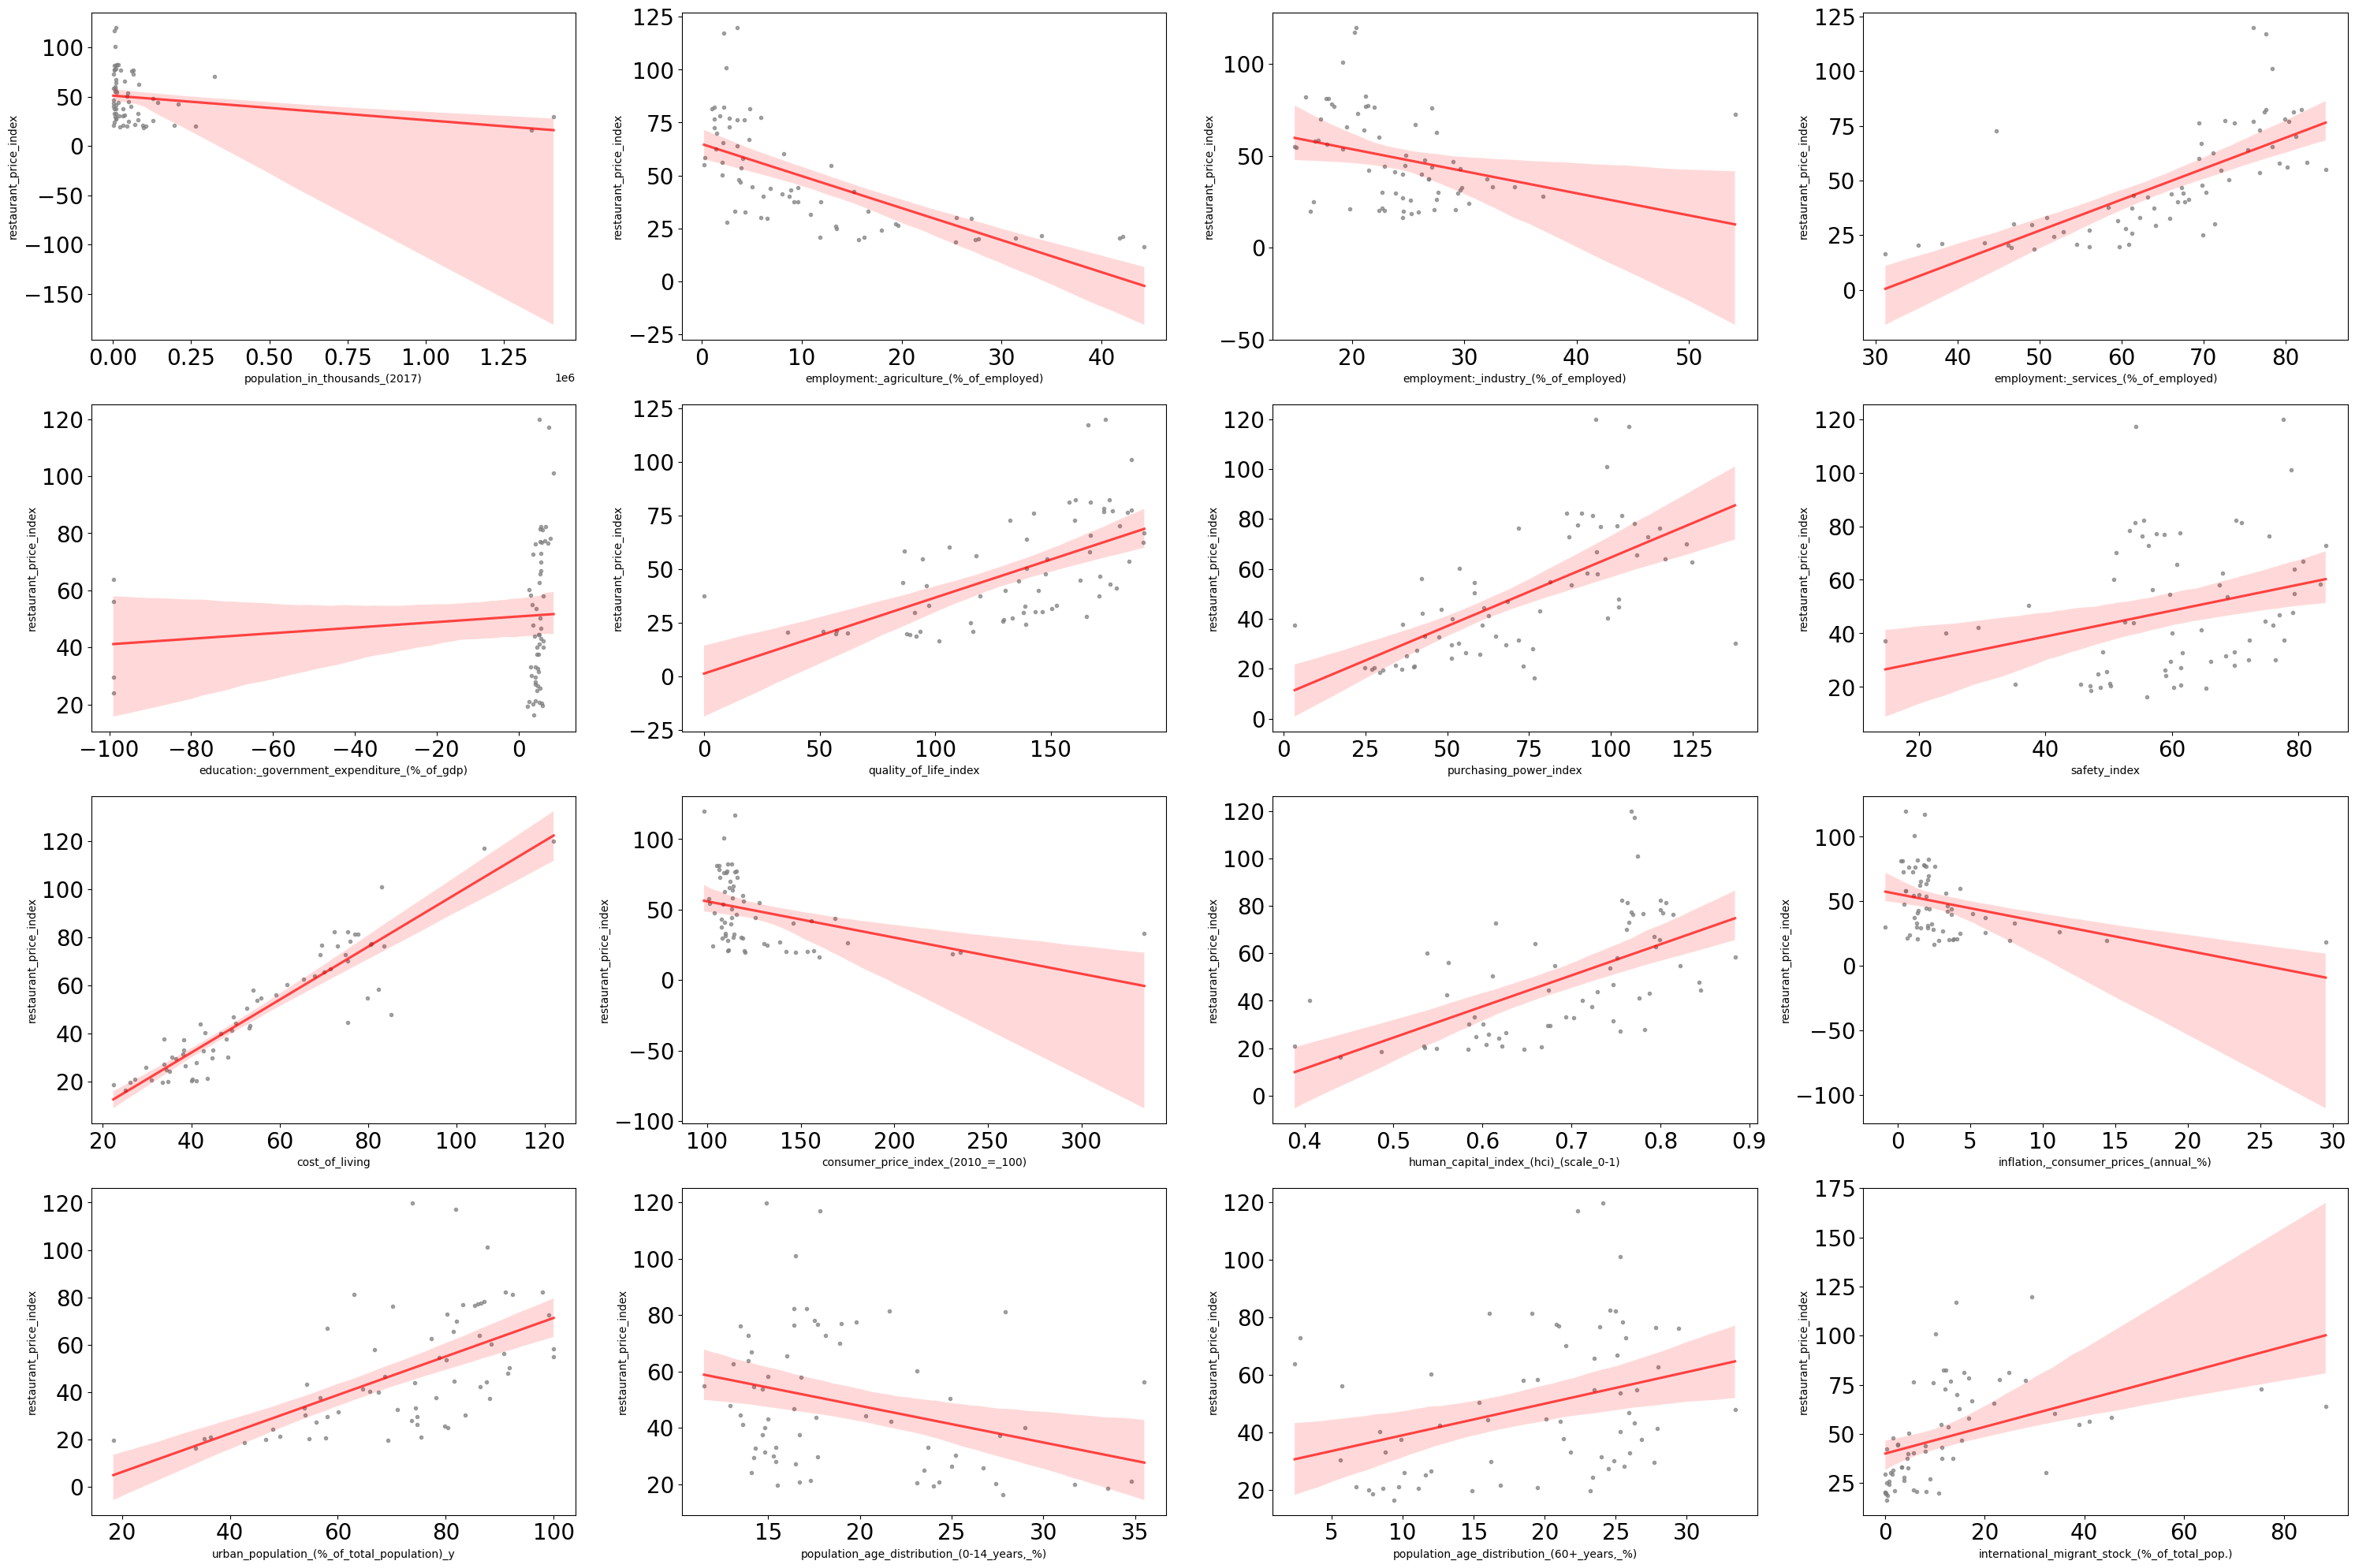

In [18]:
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (30, 20))
axes = axes.flat

for i, colum in enumerate(df_country_num):
    sns.regplot(
        x = df_country[colum], 
        y = df_country["restaurant_price_index"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.7}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    axes[i].tick_params(labelsize = 20)
    
fig.tight_layout();

In [19]:
df_country.to_csv('datos/soci_econ_country_profiles_resumido.csv')